In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.autograd as autograd
import torchvision.models as models
from PIL import Image, ImageDraw
from torch.utils.data import DataLoader

import src.roi_pooling.roi_pooling as roi_pooling
import src.voc_dataset_2 as voc_dataset

In [14]:
dataset = voc_dataset.VOCDataSetROIs("data/", "train", 20)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=5, collate_fn=voc_dataset.collate_rois_fn)
m = roi_pooling.ROIPooling(pooled_shape=(100, 100), spatial_scale=1.)
iterator = iter(dataloader)

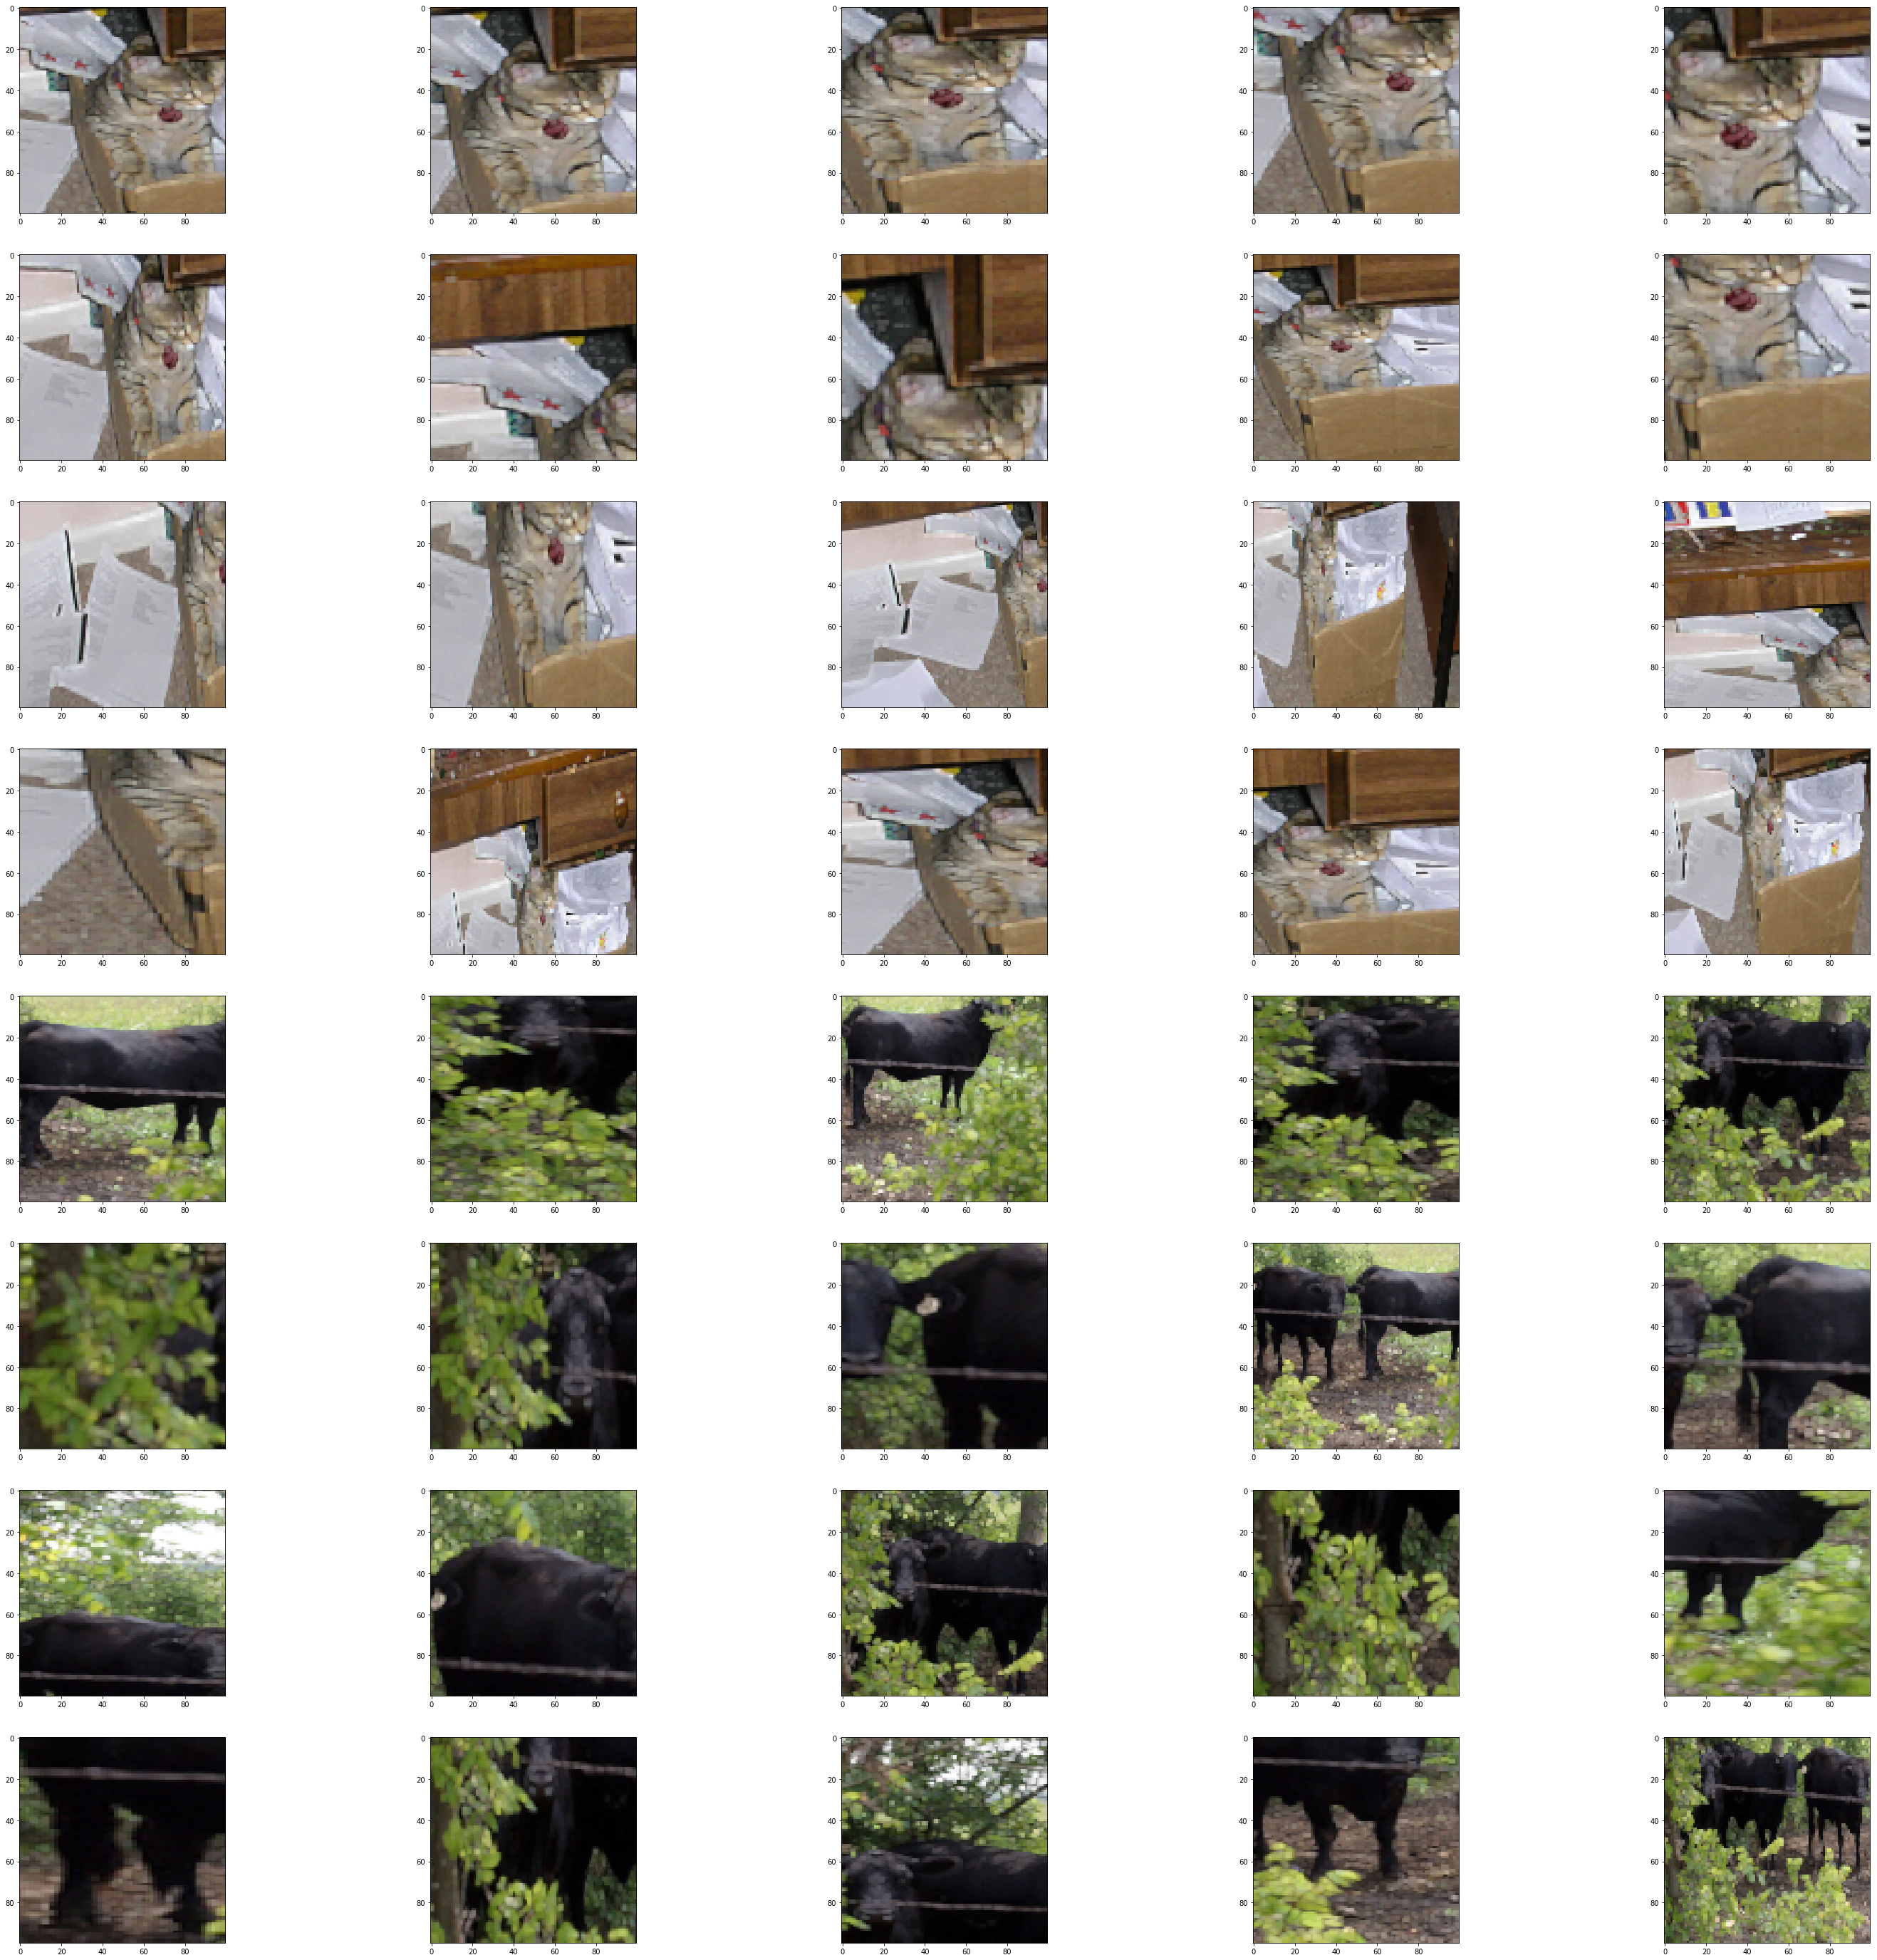

In [21]:
indices, image_arr, bboxes, labels, regression_targets, regression_weights, image_info = next(iterator)
image_arr = autograd.Variable(image_arr)

image = image_arr.cpu().data.numpy()
image = image[1, :, 0:int(image_info[1, 0]), 0:int(image_info[1, 1])].transpose(1, 2, 0) + voc_dataset.PIXEL_MEANS
image = image.round().astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)
image_draw = ImageDraw.ImageDraw(image)

proposals = autograd.Variable(torch.Tensor(bboxes))
pooled = m(image_arr, proposals)

plt.figure(figsize=(50, 50))
for i in xrange(40):
    idx = i
    pooled_image = pooled.cpu().data.numpy()[idx, :, :, :].transpose(1, 2, 0) + voc_dataset.PIXEL_MEANS
    pooled_image = pooled_image.round().astype(np.uint8)
    pooled_image = cv2.cvtColor(pooled_image, cv2.COLOR_BGR2RGB)
    plt.subplot(8, 5, i+1)
    plt.imshow(pooled_image)

In [32]:
regression_targets.size(0) + 1e-4

40.0001

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)